In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

file = pd.read_csv("data.csv")

file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = file.drop(columns=['Unnamed: 32'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df2 = df.drop(columns=['id'])
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df3 = df2.rename(columns={"concave points_worst": "concave_points_worst", "concave points_mean": "concave_points_mean"})
df3

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df10 = df3.loc[:, ["diagnosis"]]
df10["diagnosis"] = [1 if x == "M" else 0 for x in df10.diagnosis]
df10.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [6]:
df11 = df3.drop(columns=['diagnosis'])
df11

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#d scale training set
df5 = pd.concat([df10, df11], axis=1)
df5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
corrs = abs(df5.corr())["diagnosis"].sort_values(ascending=False)
corrs

diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [9]:
corrs.index

Index(['diagnosis', 'concave_points_worst', 'perimeter_worst',
       'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se'],
      dtype='object')

In [10]:
df5.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 0.064930, 0.099930, 0.161400, 99999999]

# Create labels for these bins
group_labels = ["Low", "Medium_Low","Medium_High","High"]

df5["concave_points_worst_bins"] = pd.cut(df5["concave_points_worst"], bins, labels=group_labels, include_lowest=True)
df5.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,High


In [12]:
df6=df5.drop(columns=['concave_points_worst'])
df6.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High


In [13]:
# Create bins in which to place values based upon TED Talk views
bins = [50.410000, 84.110000, 97.660000,125.400000, 99999999]

# Create labels for these bins
group_labels = ["Low", "Medium_Low","Medium_High","High"]

df6["perimeter_worst_bins"] = pd.cut(df6["perimeter_worst"], bins, labels=group_labels, include_lowest=True)
df6.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High


In [14]:
df7=df6.drop(columns=['perimeter_worst'])
df7.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High


In [15]:
# Create bins in which to place values based upon TED Talk views
bins = [0.000000, 0.020310, 0.033500,0.074000, 99999999]

# Create labels for these bins
group_labels = ["Low", "Medium_Low","Medium_High","High"]

df7["concave_points_mean_bins"] = pd.cut(df7["concave_points_mean"], bins, labels=group_labels, include_lowest=True)
df7.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High,Medium_High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High,High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High,High


In [16]:
df8=df7.drop(columns=['concave_points_mean'])
df8.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,17.33,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,23.41,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High,Medium_High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,25.53,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,26.50,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High,High
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,16.67,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High,High


In [17]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 13, 15,19, 99999999]

# Create labels for these bins
group_labels = ["Low", "Medium_Low","Medium_High","High"]

df8['radius_worst_bins'] = pd.cut(df8['radius_worst'], bins, labels=group_labels, include_lowest=True)
df8.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High,Medium_High,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High,High,Medium_Low
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High,High,High


In [18]:
df9=df8.drop(columns=['radius_worst'])
df9.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890,High,High,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902,High,High,Medium_High,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758,High,High,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.6638,0.17300,High,Medium_High,High,Medium_Low
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678,High,High,High,High


In [19]:
df9

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,concave_points_worst_bins,perimeter_worst_bins,concave_points_mean_bins,radius_worst_bins
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,...,2019.0,0.16220,0.66560,0.7119,0.4601,0.11890,High,High,High,High
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,...,1956.0,0.12380,0.18660,0.2416,0.2750,0.08902,High,High,Medium_High,High
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,...,1709.0,0.14440,0.42450,0.4504,0.3613,0.08758,High,High,High,High
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,...,567.7,0.20980,0.86630,0.6869,0.6638,0.17300,High,Medium_High,High,Medium_Low
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,...,1575.0,0.13740,0.20500,0.4000,0.2364,0.07678,High,High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,...,2027.0,0.14100,0.21130,0.4107,0.2060,0.07115,High,High,High,High
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,...,1731.0,0.11660,0.19220,0.3215,0.2572,0.06637,High,High,High,High
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,...,1124.0,0.11390,0.30940,0.3403,0.2218,0.07820,Medium_High,High,Medium_High,Medium_High
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,...,1821.0,0.16500,0.86810,0.9387,0.4087,0.12400,High,High,High,High


In [20]:
# get dums
dums_linear = pd.get_dummies(df9.loc[:, ['diagnosis','concave_points_worst_bins', 'perimeter_worst_bins',
       'concave_points_mean_bins', 'radius_worst_bins']], drop_first=True)
df_sub = df9.loc[:, ['perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean']]

In [21]:
dums_linear

,diagnosis,concave_points_worst_bins_Medium_Low,concave_points_worst_bins_Medium_High,concave_points_worst_bins_High,perimeter_worst_bins_Medium_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_High,concave_points_mean_bins_Medium_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_High,radius_worst_bins_Medium_Low,radius_worst_bins_Medium_High,radius_worst_bins_High
0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,1,0,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0,0,1
3,1,0,0,1,0,1,0,0,0,1,1,0,0
4,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,0,1,0,0,1,0,0,1,0,0,1
565,1,0,0,1,0,0,1,0,0,1,0,0,1
566,1,0,1,0,0,0,1,0,1,0,0,1,0
567,1,0,0,1,0,0,1,0,0,1,0,0,1


In [22]:
df_sub

,perimeter_mean,area_worst,radius_mean,area_mean
0,122.80,2019.0,17.99,1001.0
1,132.90,1956.0,20.57,1326.0
2,130.00,1709.0,19.69,1203.0
3,77.58,567.7,11.42,386.1
4,135.10,1575.0,20.29,1297.0
...,...,...,...,...
564,142.00,2027.0,21.56,1479.0
565,131.20,1731.0,20.13,1261.0
566,108.30,1124.0,16.60,858.1
567,140.10,1821.0,20.60,1265.0


In [23]:
#concat
df_new = pd.concat([dums_linear, df_sub], axis=1)
df_new

,diagnosis,concave_points_worst_bins_Medium_Low,concave_points_worst_bins_Medium_High,concave_points_worst_bins_High,perimeter_worst_bins_Medium_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_High,concave_points_mean_bins_Medium_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_High,radius_worst_bins_Medium_Low,radius_worst_bins_Medium_High,radius_worst_bins_High,perimeter_mean,area_worst,radius_mean,area_mean
0,1,0,0,1,0,0,1,0,0,1,0,0,1,122.80,2019.0,17.99,1001.0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,132.90,1956.0,20.57,1326.0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,130.00,1709.0,19.69,1203.0
3,1,0,0,1,0,1,0,0,0,1,1,0,0,77.58,567.7,11.42,386.1
4,1,0,0,1,0,0,1,0,0,1,0,0,1,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,0,1,0,0,1,0,0,1,0,0,1,142.00,2027.0,21.56,1479.0
565,1,0,0,1,0,0,1,0,0,1,0,0,1,131.20,1731.0,20.13,1261.0
566,1,0,1,0,0,0,1,0,1,0,0,1,0,108.30,1124.0,16.60,858.1
567,1,0,0,1,0,0,1,0,0,1,0,0,1,140.10,1821.0,20.60,1265.0


In [24]:
df_new.corr()

,diagnosis,concave_points_worst_bins_Medium_Low,concave_points_worst_bins_Medium_High,concave_points_worst_bins_High,perimeter_worst_bins_Medium_Low,perimeter_worst_bins_Medium_High,perimeter_worst_bins_High,concave_points_mean_bins_Medium_Low,concave_points_mean_bins_Medium_High,concave_points_mean_bins_High,radius_worst_bins_Medium_Low,radius_worst_bins_Medium_High,radius_worst_bins_High,perimeter_mean,area_worst,radius_mean,area_mean
diagnosis,1.000000,-0.377194,0.084777,0.731537,-0.385593,0.093177,0.739936,-0.360395,0.084777,0.714738,-0.407187,0.116789,0.732873,0.742636,0.733825,0.730029,0.708984
concave_points_worst_bins_Medium_Low,-0.377194,1.000000,-0.332553,-0.332553,0.249266,-0.060412,-0.295016,0.474486,-0.116717,-0.323169,0.269062,-0.084280,-0.282287,-0.278526,-0.288349,-0.270080,-0.272488
concave_points_worst_bins_Medium_High,0.084777,-0.332553,1.000000,-0.332553,-0.051027,0.324339,-0.022875,-0.126101,0.558944,-0.116717,-0.082713,0.274018,-0.008849,0.078655,0.004988,0.078913,0.046601
concave_points_worst_bins_High,0.731537,-0.332553,-0.332553,1.000000,-0.295016,-0.032259,0.652786,-0.332553,-0.107333,0.774780,-0.314145,0.019438,0.622888,0.651722,0.680065,0.628622,0.624044
perimeter_worst_bins_Medium_Low,-0.385593,0.249266,-0.051027,-0.295016,1.000000,-0.332553,-0.332553,0.286803,-0.051027,-0.313784,0.833755,-0.263429,-0.329432,-0.262217,-0.293826,-0.252913,-0.273102
perimeter_worst_bins_Medium_High,0.093177,-0.060412,0.324339,-0.032259,-0.332553,1.000000,-0.332553,-0.041643,0.343108,-0.088564,-0.240087,0.877469,-0.301145,0.041956,-0.054410,0.038863,-0.025389
perimeter_worst_bins_High,0.739936,-0.295016,-0.022875,0.652786,-0.332553,-0.332553,1.000000,-0.313784,-0.069796,0.718475,-0.341916,-0.282287,0.962329,0.817130,0.832334,0.814517,0.818335
concave_points_mean_bins_Medium_Low,-0.360395,0.474486,-0.126101,-0.332553,0.286803,-0.041643,-0.313784,1.000000,-0.332553,-0.332553,0.241291,-0.027707,-0.301145,-0.273510,-0.286119,-0.265421,-0.270850
concave_points_mean_bins_Medium_High,0.084777,-0.116717,0.558944,-0.107333,-0.051027,0.343108,-0.069796,-0.332553,1.000000,-0.332553,-0.054942,0.292876,-0.065422,0.017557,-0.029852,0.016382,-0.021447
concave_points_mean_bins_High,0.714738,-0.323169,-0.116717,0.774780,-0.313784,-0.088564,0.718475,-0.332553,-0.332553,1.000000,-0.323402,-0.055993,0.698319,0.718868,0.710476,0.696986,0.698501


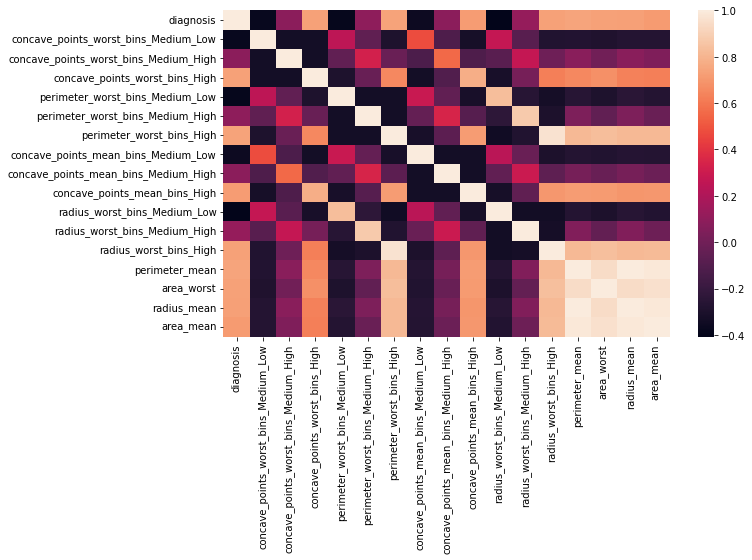

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr())
plt.show()

In [26]:
df_new.groupby("diagnosis").size()

diagnosis
0    357
1    212
dtype: int64

In [27]:
# get pandas columns for prediction
target = df_new["diagnosis"]
features = df_new.drop(["diagnosis"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\sslomowitz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       285
           1       0.97      0.91      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455


Confusion Matrix - In Sample
[[281   4]
 [ 15 155]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix - Out Sample
[[71  1]
 [ 3 39]]


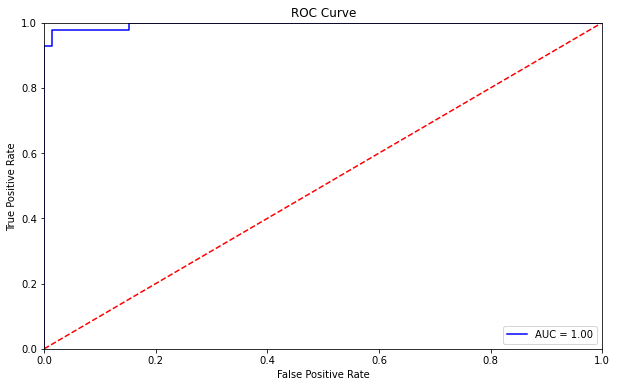

In [28]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#import pickle

In [30]:
# save the model to disk
#filename = 'finalized_model20.sav'
#pickle.dump(reg, open(filename, 'wb'))

In [31]:
#content = {'sex_flag': '0', 'age': '35', 'fare': '50', 'familySize': '3', 'p_class': '2', 'embarked': 'Q'}
#content